In [30]:
import glob
from collections import defaultdict
import pickle

import numpy as np
import matplotlib.pyplot as plt
from torch import norm

In [36]:
root = '.\\results\\grad-norm\\'
results = defaultdict(lambda: {'param-norms': None, 'grad-norms': None})

for fn in glob.glob(root + '**/param-norms.pkl', recursive=True):
    dataset, gnn, dropout, prob, _ = fn.lstrip(root).split('\\')
    prob = float(prob.split('=')[1]) / 100.
    with open(fn, 'rb') as f:
        param_norms = pickle.load(f)
        results[(gnn, dropout, prob)]['param-norms'] = np.array(param_norms)

for fn in glob.glob(root + '**/grad-norms.pkl', recursive=True):
    dataset, gnn, dropout, prob, _ = fn.lstrip(root).split('\\')
    prob = float(prob.split('=')[1]) / 100.
    with open(fn, 'rb') as f:
        grad_norms = pickle.load(f)
        results[(gnn, dropout, prob)]['grad-norms'] = np.array(grad_norms)

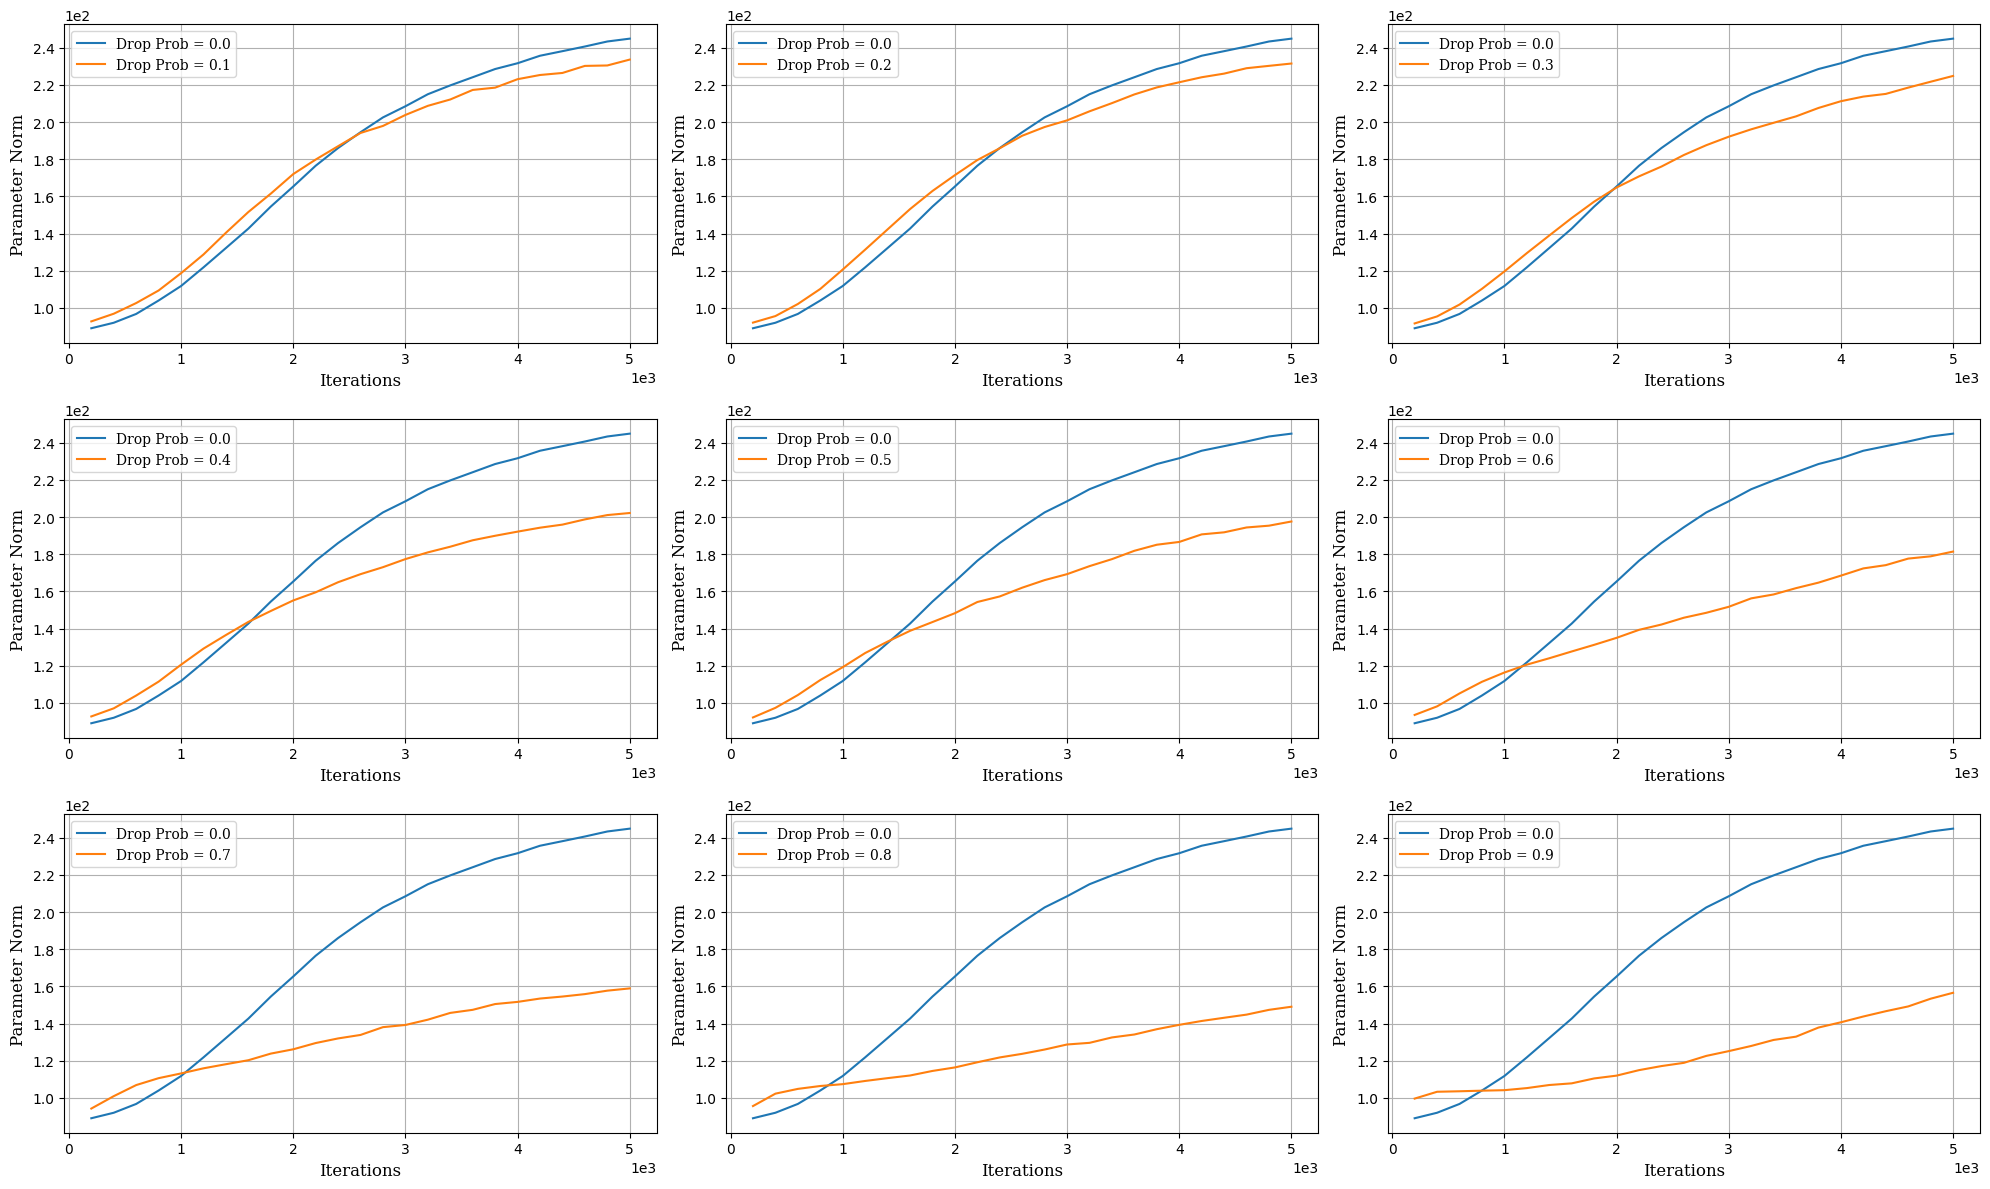

In [37]:
fontdict = {'font':'serif', 'size':12}
fig, axs = plt.subplots(3, 3, figsize=(20,12))
step = 200; batches = range(step, 5001, step)

for i, drop_p in enumerate(range(10, 91, 10)):
    
    ax = axs[i//3, i%3]; drop_p = drop_p / 100
    for p in (0.0, drop_p):
        result = results.get(('GCN', 'Dropout', p), None)
        if result is None: continue
        norms = result.get('param-norms', None)
        if norms is None: continue
        y = [norms[batch-1] for batch in batches]
        ax.plot(batches, y, label=f'Drop Prob = {p}')

    ax.set_xlabel('Iterations', fontdict=fontdict)
    ax.set_ylabel('Parameter Norm', fontdict=fontdict)
    ax.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
    ax.grid()
    ax.legend(prop={'family':fontdict['font'],'size':fontdict['size']-2})

fig.tight_layout()
plt.show()

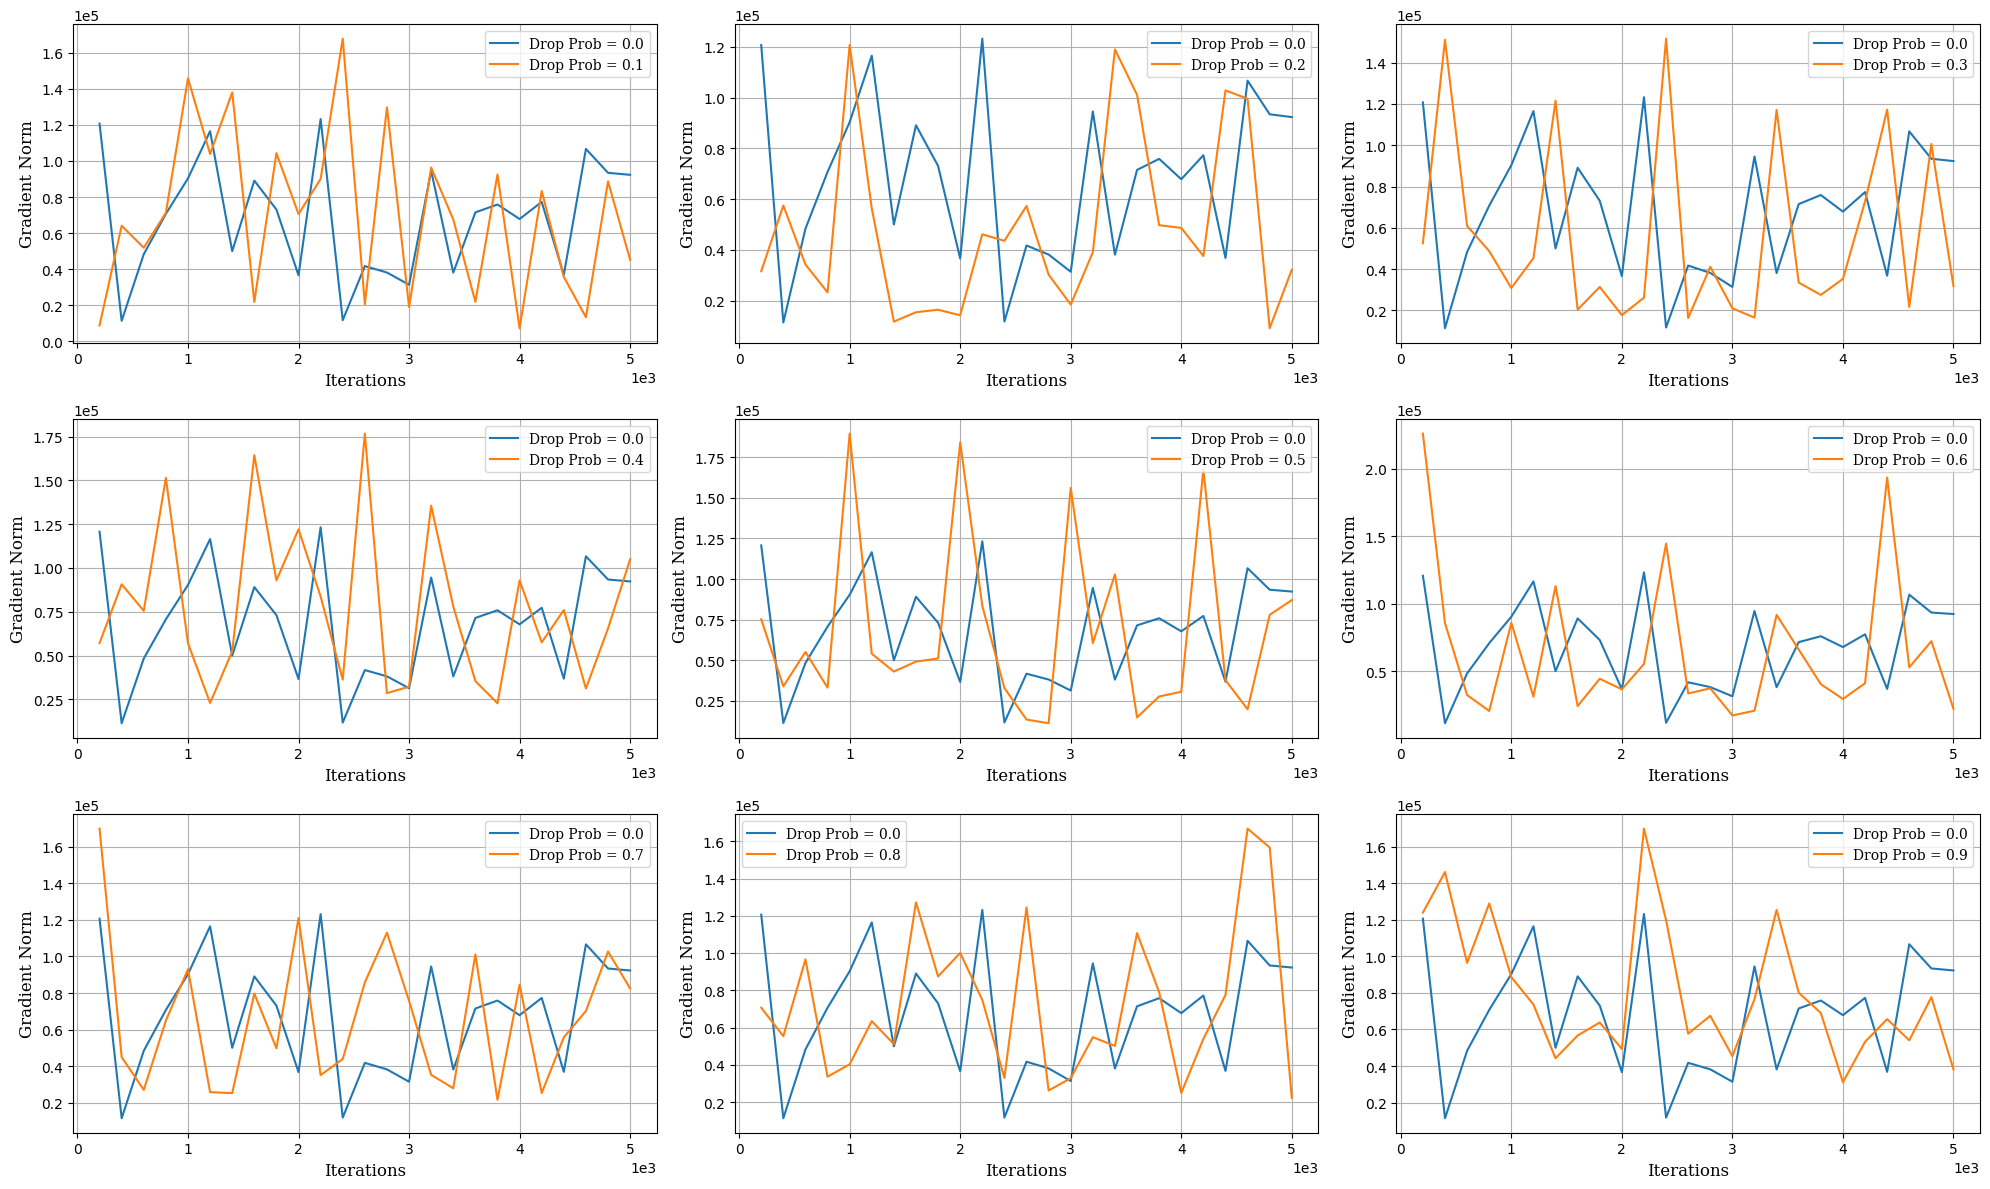

In [38]:
fontdict = {'font':'serif', 'size':12}
fig, axs = plt.subplots(3, 3, figsize=(20,12))
step = 200; batches = range(step, 5001, step)

for i, drop_p in enumerate(range(10, 91, 10)):
    
    ax = axs[i//3, i%3]; drop_p = drop_p / 100
    for p in (0.0, drop_p):
        result = results.get(('GCN', 'Dropout', p), None)
        if result is None: continue
        norms = result.get('grad-norms', None)
        if norms is None: continue
        y = [norms[batch-1] for batch in batches]
        ax.plot(batches, y, label=f'Drop Prob = {p}')

    ax.set_xlabel('Iterations', fontdict=fontdict)
    ax.set_ylabel('Gradient Norm', fontdict=fontdict)
    ax.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
    ax.grid()
    ax.legend(prop={'family':fontdict['font'],'size':fontdict['size']-2})

fig.tight_layout()
plt.show()